<a href="https://colab.research.google.com/github/sahithinamala/MachineLearning/blob/main/Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision

In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/content/sample_data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/content/sample_data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [ ]:
example_data.shape

torch.Size([1000, 1, 28, 28])

In [ ]:
example_targets.shape

torch.Size([1000])

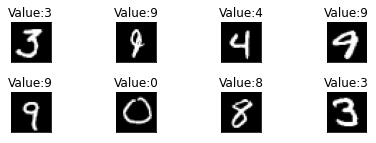

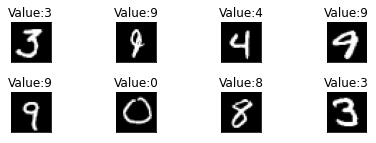

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(8):

  plt.subplot(4,4,i+1)
  plt.imshow(example_data[i][0], cmap='gray')
  plt.tight_layout()
  plt.title("Value:{}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,momentum=momentum)

In [ ]:
network.train()

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:
i*len(train_loader.dataset)

420000

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), '/content/drive/MyDrive/model.pth')
      torch.save(optimizer.state_dict(), '/content/drive/MyDrive/optimizer.pth')

In [ ]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [ ]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3096, Accuracy: 924/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313179
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.300776
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.298872
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.276723
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.241102
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.248662
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.189547
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.146399
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.107701
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.011356
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.843857
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.758839
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.672644
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.687645
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.426628
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.284204
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.318824
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.445287
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.140686
Train Epoch: 1 [12160/6

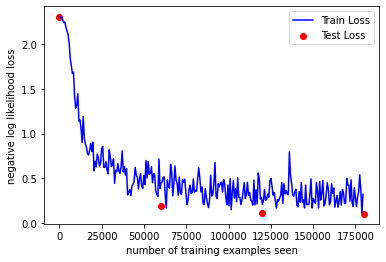

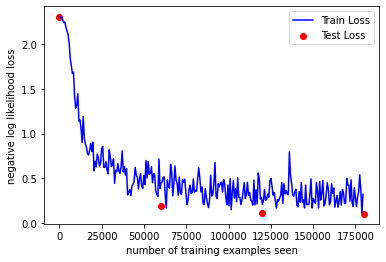

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [ ]:
with torch.no_grad():
  output = network(example_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


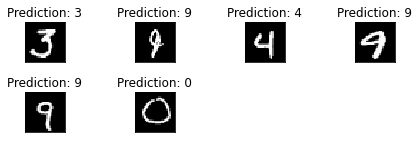

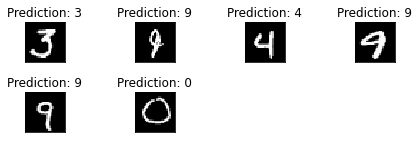

In [ ]:
fig = plt.figure()
for i in range(6):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)

In [ ]:
network_state_dict = torch.load("/content/drive/MyDrive/model.pth")
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load("/content/drive/MyDrive/optimizer.pth")
continued_optimizer.load_state_dict(optimizer_state_dict)

In [ ]:
for i in range(4,9):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.193870
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.350293
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.345463
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.382270
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.484871
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.130094
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.284531
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.345563
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.156488
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.210286
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.162580
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.146145
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.227633
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.398662
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.426623
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.159059
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.143804
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.455427
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.139590
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.228756
Train Epoch: 4 [12800/60000 (

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0805, Accuracy: 9743/10000 (97%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.709255
Train Epoch: 5 [640/60000 (1%)]	Loss: 0.251142
Train Epoch: 5 [1280/60000 (2%)]	Loss: 0.423863
Train Epoch: 5 [1920/60000 (3%)]	Loss: 0.286563
Train Epoch: 5 [2560/60000 (4%)]	Loss: 0.106160
Train Epoch: 5 [3200/60000 (5%)]	Loss: 0.246190
Train Epoch: 5 [3840/60000 (6%)]	Loss: 0.194533
Train Epoch: 5 [4480/60000 (7%)]	Loss: 0.195916
Train Epoch: 5 [5120/60000 (9%)]	Loss: 0.168419
Train Epoch: 5 [5760/60000 (10%)]	Loss: 0.274615
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.202643
Train Epoch: 5 [7040/60000 (12%)]	Loss: 0.215181
Train Epoch: 5 [7680/60000 (13%)]	Loss: 0.161385
Train Epoch: 5 [8320/60000 (14%)]	Loss: 0.217304
Train Epoch: 5 [8960/60000 (15%)]	Loss: 0.209645
Train Epoch: 5 [9600/60000 (16%)]	Loss: 0.379260
Train Epoch: 5 [10240/60000 (17%)]	Loss: 0.384919
Train Epoch: 5 [10880/60000 (18%)]	Loss: 0.391416
Train Epoch: 5 [11520/60000 (19%)]	Loss: 0.229624
Train Epoch: 5 [12160

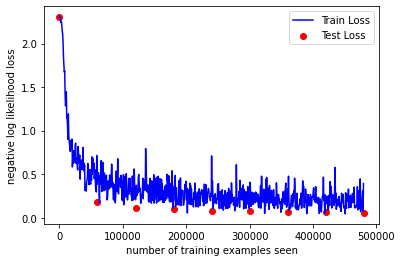

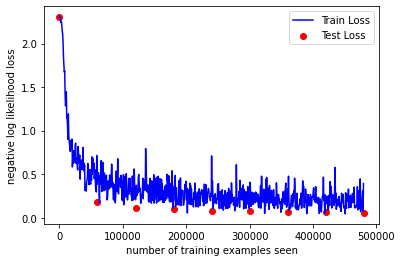

In [ ]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig